# Get data from kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fvantonio1","key":"754abc868b25b8ba91b8128b24374129"}'}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                              title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/piterfm/2022-ukraine-russian-war                        2022 Ukraine Russia War                              2KB  2022-03-31 09:44:51           3627        230  1.0              
datasets/prasertk/healthy-lifestyle-cities-report-2021           Healthy Lifestyle Cities Report 2021                 2KB  2022-03-03 00:26:02           3458        103  1.0              
datasets/kamilpytlak/personal-key-indicators-of-heart-disease    Personal Key Indicators of Heart Disease             3MB  2022-02-16 10:18:03           6190        132  1.0              
datasets/vivek468/superstore-dataset-final                  

In [ ]:
!kaggle datasets download -d moltean/fruits

100% 1.28G/1.28G [00:07<00:00, 174MB/s]
100% 1.28G/1.28G [00:07<00:00, 179MB/s]


In [ ]:
!mkdir data

In [ ]:
!unzip fruits.zip -d data

# Prepare data

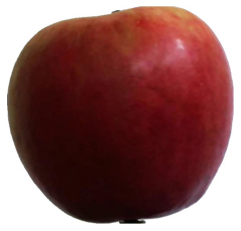

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = '/content/data/fruits-360-original-size/fruits-360-original-size/Training'
val_path = '/content/data/fruits-360-original-size/fruits-360-original-size/Validation'

image_files = glob(train_path + '/*/*.jp*g')
val_image_files = glob(val_path + '/*/*.jp*g')

folders = glob(train_path + '/*')

img = image.img_to_array(image.load_img(np.random.choice(image_files))).astype('uint8')
plt.imshow(img)
plt.axis(False);

In [ ]:
len(folders)

24

In [ ]:
IMAGE_SIZE = [100, 100]

batch_size = 32
epochs = 5

vgg = VGG16(input_shape=IMAGE_SIZE + [3], include_top=False, weights='imagenet')

for layer in vgg.layers:
  layer.trainable=False


x = Flatten()(vgg.output)
x = Dense(1024, activation='relu')(x)
output = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
for layer in model.layers:
  print(f'Nome: {layer.name}, Trainavel: {layer.trainable}')

Nome: input_2, Trainavel: False
Nome: block1_conv1, Trainavel: False
Nome: block1_conv2, Trainavel: False
Nome: block1_pool, Trainavel: False
Nome: block2_conv1, Trainavel: False
Nome: block2_conv2, Trainavel: False
Nome: block2_pool, Trainavel: False
Nome: block3_conv1, Trainavel: False
Nome: block3_conv2, Trainavel: False
Nome: block3_conv3, Trainavel: False
Nome: block3_pool, Trainavel: False
Nome: block4_conv1, Trainavel: False
Nome: block4_conv2, Trainavel: False
Nome: block4_conv3, Trainavel: False
Nome: block4_pool, Trainavel: False
Nome: block5_conv1, Trainavel: False
Nome: block5_conv2, Trainavel: False
Nome: block5_conv3, Trainavel: False
Nome: block5_pool, Trainavel: False
Nome: flatten_1, Trainavel: True
Nome: dense_1, Trainavel: True
Nome: dense_2, Trainavel: True


Found 6231 images belonging to 24 classes.
{'apple_6': 0, 'apple_braeburn_1': 1, 'apple_crimson_snow_1': 2, 'apple_golden_1': 3, 'apple_golden_2': 4, 'apple_golden_3': 5, 'apple_granny_smith_1': 6, 'apple_hit_1': 7, 'apple_pink_lady_1': 8, 'apple_red_1': 9, 'apple_red_2': 10, 'apple_red_3': 11, 'apple_red_delicios_1': 12, 'apple_red_yellow_1': 13, 'apple_rotten_1': 14, 'cabbage_white_1': 15, 'carrot_1': 16, 'cucumber_1': 17, 'cucumber_3': 18, 'eggplant_violet_1': 19, 'pear_1': 20, 'pear_3': 21, 'zucchini_1': 22, 'zucchini_dark_1': 23}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


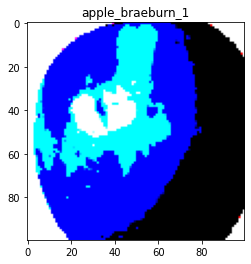

In [ ]:
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

test_gen = gen.flow_from_directory(train_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

for x, y in test_gen:
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show();
  break

In [ ]:
train_generator = gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size,
)

val_generator = gen.flow_from_directory(
    val_path,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size,
)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

h = model.fit(train_generator,
              validation_data=val_generator,
              epochs=epochs,
              steps_per_epoch=len(image_files) // batch_size,
              validation_steps=len(val_image_files) // batch_size)

Found 6231 images belonging to 24 classes.
Found 3114 images belonging to 24 classes.
Epoch 1/5
194/194 [==============================] - 965s 5s/step - loss: 3.9735 - accuracy: 0.8279 - val_loss: 0.9209 - val_accuracy: 0.9149
Epoch 2/5
194/194 [==============================] - 964s 5s/step - loss: 0.5320 - accuracy: 0.9402 - val_loss: 0.3243 - val_accuracy: 0.9601
Epoch 3/5
194/194 [==============================] - 987s 5s/step - loss: 0.4501 - accuracy: 0.9495 - val_loss: 0.9129 - val_accuracy: 0.9330
Epoch 4/5
194/194 [==============================] - 962s 5s/step - loss: 0.3383 - accuracy: 0.9605 - val_loss: 0.3331 - val_accuracy: 0.9575
Epoch 5/5
194/194 [==============================] - 964s 5s/step - loss: 0.4736 - accuracy: 0.9581 - val_loss: 0.4145 - val_accuracy: 0.9539


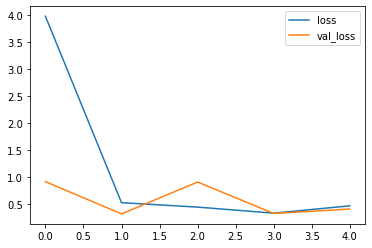

In [ ]:
plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.show();

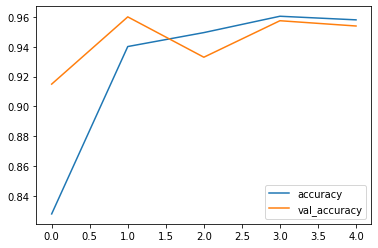

In [ ]:
plt.plot(h.history['accuracy'], label='accuracy')
plt.plot(h.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show();